In [76]:
import numpy as np

# Define the set
X = 2*np.random.rand(200, 1)
y = -2 + 7*X + np.random.randn(200, 1)

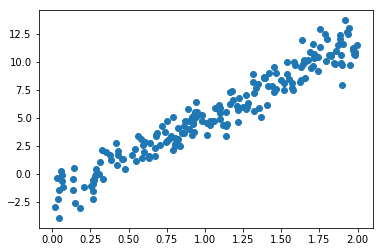

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

clf = LinearRegression()
clf.fit(X, y)
y_pred = cross_val_predict(clf, X, y, cv=3)
print(mean_squared_error(y, y_pred))

1.15472414234


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[[-1.8720739 ]
 [ 6.91987736]]


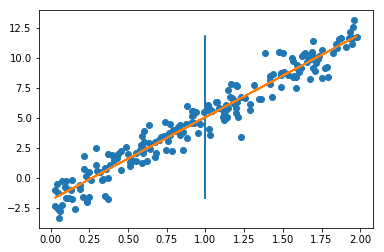

[ 0.88101303]


In [77]:
# Normal Equation

X_b = np.c_[np.ones((200, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta)

plt.scatter(X, y)
plt.plot(X_b, X_b.dot(theta))
plt.show()

error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/200
print(error)

[[-1.86286525]
 [ 6.91180046]]


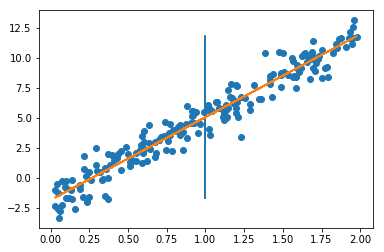

[ 0.88103564]


In [79]:
# Batch Gradient Descent

epochs = 200
alpha = 0.1    # learning rate
m = 200
epsilon = 0.1
theta = np.random.rand(2, 1)
for epoch in range(epochs):
    gradient = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha*(gradient)

print(theta)

plt.scatter(X, y)
plt.plot(X_b, X_b.dot(theta))
plt.show()

error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/200
print(error)

[[-1.93299376]
 [ 6.87237292]]


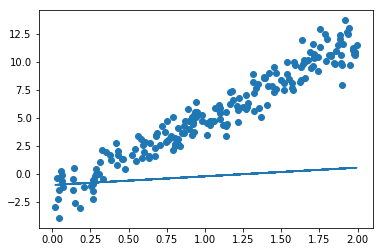

In [29]:
# Stochastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50

learning_schedule = lambda t: t0/(t+t1)

theta = np.random.randn(2, 1)
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta))
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradient

print(theta)

[[-1.99634348]
 [ 6.93258857]]


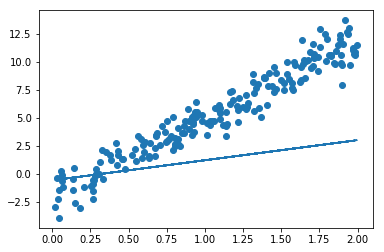

In [27]:
# Mini_Batch Gradient Descent

n_epochs = 50
t0, t1 = 5, 50
batch_size = 50

learning_schedule = lambda t: t0/(t+t1)

theta = np.random.randn(2, 1)
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta))
for epoch in range(n_epochs):
    for i in range(m):
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradient

print(theta)

[[-0.09040848]
 [ 5.45336623]]


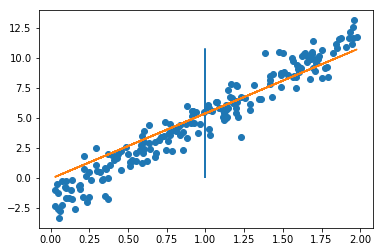

[ 1.6936999]


In [98]:
# Ridge Regression (Tikhonov Regression)

theta = np.linalg.inv(X_b.T.dot(X_b) + regularization_coef*np.identity(2)).dot(X_b.T).dot(y) # closed Form


In [99]:
theta = np.linalg.inv(X_b.T.dot(X_b) + regularization_coef*np.identity(2)).dot(X_b.T).dot(y)
print(theta)

[[-1.87064735]
 [ 6.91850071]]


In [117]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()

In [118]:
X, y = data['data'], data['target']
print(X.shape)

(150, 4)


In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = (y_train == 2)
y_test = (y_test ==2)

In [120]:
sigmoid = lambda t: 1/(1 + np.exp(-t))

In [121]:
x_train = np.c_[np.ones((120, 1)), x_train]
x_train.shape

(120, 5)

In [127]:
def fit(x_train, y_train):    
    n_epochs = 100
    t0, t1 = 5, 50
    m = 120
    learning_schedule = lambda t: t0/(t+t1)

    theta = np.random.randn(5, 1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = x_train[random_index:random_index+1]
            yi = y_train[random_index:random_index+1]
            gradient = (2* xi.T.dot(sigmoid(xi.dot(theta)) - yi))
            eta = learning_schedule(epoch*m+i)
            theta = theta - eta*gradient

    return theta

In [20]:
import numpy as np
import matplotlib.pyplot as plt
X = 20*(2*np.random.rand(100, 1) - 1)
y =X**2 - 7*X + 12 +10*(2*np.random.randn(100, 1)-1)

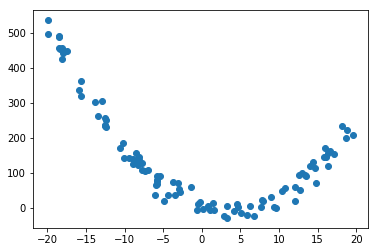

In [21]:
%matplotlib inline
plt.scatter(X, y)
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

f = PolynomialFeatures(degree=2, include_bias=False)
X_poly = f.fit_transform(X)

In [33]:
from sklearn.linear_model import Lasso

model = Lasso(0.2)
model.fit(X_poly, y)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
y_pred = model.predict(X_poly)

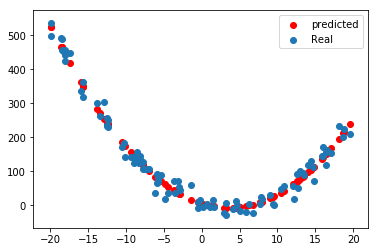

In [35]:
plt.scatter(X, y_pred, color='r', label='predicted')
plt.scatter(X, y, label='Real')
plt.legend()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

y_pr = cross_val_predict(model, X_poly, y, cv=3)
score = mean_squared_error(y, y_pr)
print(score)

422.08546995519254
